In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\siddh\Downloads\archive\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Split the dataset into features (X) and target variable (y)

In [4]:
X = df.drop("Outcome",axis=1) 
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y = df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=66)

In [7]:
X_train.shape, y_train.shape

((576, 8), (576,))

In [8]:
X_test.shape, y_test.shape

((192, 8), (192,))

In [9]:
# Build the Decision Tree Classifier model
dt=DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [10]:
# Make predictions on the test set
dt_pred=dt.predict(X_test)

In [11]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
# Printing the training and testing accuracy of the classifier
print("Train Accuracy of Decesion Tree: ", dt.score(X_train, y_train)*100)
print("Accuracy (Test) Score of Decesion Tree: ", dt.score(X_test, y_test)*100)
print("Accuracy Score of Decesion Tree: ", accuracy_score(y_test, dt_pred)*100)

Train Accuracy of Decesion Tree:  63.541666666666664
Accuracy (Test) Score of Decesion Tree:  69.79166666666666
Accuracy Score of Decesion Tree:  71.35416666666666


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
# Classificatrion Report
print('Classification Report of Decision Tree: \n', classification_report(y_test, dt_pred, digits=4))

Classification Report of Decision Tree: 
               precision    recall  f1-score   support

           0     0.8264    0.7463    0.7843       134
           1     0.5211    0.6379    0.5736        58

    accuracy                         0.7135       192
   macro avg     0.6738    0.6921    0.6790       192
weighted avg     0.7342    0.7135    0.7207       192



In [20]:
# Confusion matrix of y_test and predicted values
cm = confusion_matrix(y_test, dt_pred)
print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN - True Negative 100
FP - False Positive 34
FN - False Negative 21
TP - True Positive 37
Accuracy Rate: 71.35416666666666
Misclassification Rate: 28.645833333333332


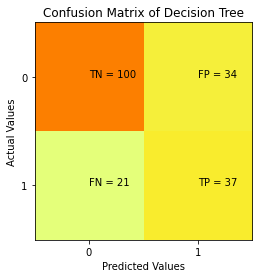

In [21]:
# Visualization of Actual vs Predicted Values
plt.clf()
plt.imshow(CM,cmap=plt.cm.Wistia)
classes = ['0', '1']
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
v = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(v[i][j]) + " = " + str(cm[i][j]))

plt.show()

Glucose is the important feature to classify diabetes


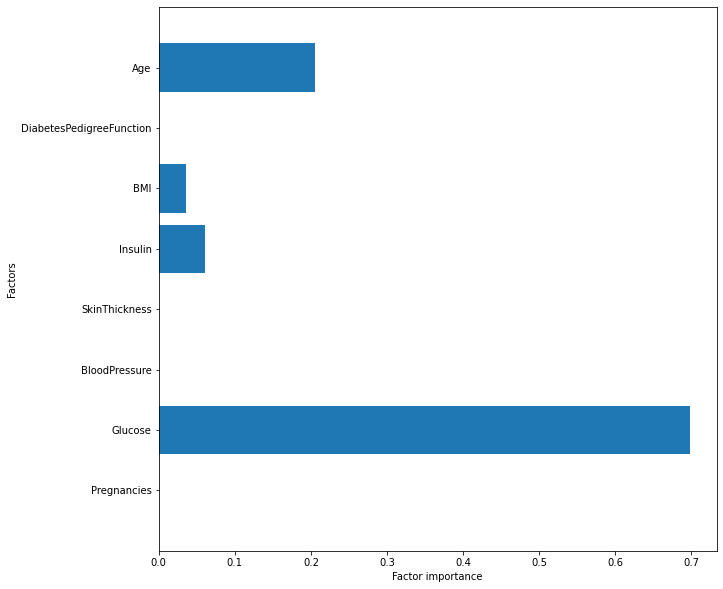

In [22]:
# Feature importance Visualization
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(10,10))
    no_features = 8
    plt.barh(range(no_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(no_features),X)
    plt.xlabel("Factor importance")
    plt.ylabel("Factors")
    plt.ylim(-1,no_features)
plot_feature_importances_diabetes(dt)
print("Glucose is the important feature to classify diabetes")